In [75]:
import json
import random
import string
import collections
import matplotlib.pyplot as plt

teil_path = "../js/data/teilnehmer.json"
prot_path = "../js/data/protokolle.json"

In [2]:
def read_json_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f, object_pairs_hook=collections.OrderedDict)
            return data
    except FileNotFoundError:
        print("The file could not be found.")
        return None
    except json.JSONDecodeError:
        print("Error decoding JSON.")
        return None

In [17]:
teil_data = read_json_file(teil_path)
prot_data = read_json_file(prot_path)
prot_data[0]

OrderedDict([('id', 1),
             ('band', 1),
             ('sn', 1872.0),
             ('seite', 1),
             ('sok', True),
             ('datum', '1872-05-07'),
             ('dok', True),
             ('titel',
              '[Hermann] Kortum. Geometrische Aufgaben $3$ten und $4$ten grades.'),
             ('ktitel', ''),
             ('speaker', [217])])

In [31]:
seminar_to_teilnehmer = collections.defaultdict(list)
for teilnehmer, teil_dict in teil_data.items():
    for sn in teil_dict['sns']:
        print(sn, teilnehmer)
        seminar_to_teilnehmer[sn].append(teilnehmer)
        

1879.0 121
1879.5 121
1880.5 121
1882.0 121
1893.5 121
1897.5 121
1900.0 121
1907.0 121
1878.4 931
1911.0 931
1890.0 876
1892.0 876
1876.4 425
1902.5 992
1906.0 651
1894.5 110
1912.0 949
1912.0 803
1906.0 647
1878.5 656
1879.0 656
1879.5 656
1885.0 196
1900.5 178
1894.0 1101
1895.5 1101
1896.0 1101
1908.0 679
1900.5 166
1901.5 166
1912.0 1022
1904.0 818
1875.5 339
1876.5 339
1901.5 745
1904.5 495
1905.0 495
1872.0 582
1878.4 422
1880.5 327
1883.0 327
1899.5 1087
1911.5 796
1896.5 1000
1897.0 1000
1897.5 1000
1909.0 526
1909.5 526
1892.0 171
1893.5 964
1899.0 474
1903.5 1103
1904.0 248
1900.0 981
1901.0 981
1909.5 981
1887.4 565
1897.0 776
1890.0 822
1892.0 822
1879.5 591
1880.0 591
1897.5 382
1883.5 1141
1884.0 1141
1884.5 1141
1885.0 1141
1905.0 1138
1901.5 277
1902.0 277
1896.0 488
1907.5 1136
1892.0 611
1896.5 1200
1897.0 1200
1881.5 1184
1882.0 1184
1911.5 108
1910.5 405
1899.0 738
1886.0 322
1886.5 322
1887.4 322
1904.5 356
1902.0 1102
1898.5 266
1899.5 409
1891.0 349
1892.5 349
1

In [54]:
seminar_to_speaker = collections.defaultdict(list)
for talk in prot_data:
    seminar_to_speaker[talk['sn']]+= map(str, (talk['speaker']))

In [67]:
# assert speaker always teilnehmer
assert seminar_to_speaker.keys() == seminar_to_teilnehmer.keys() 
for key in seminar_to_speaker.keys():
    assert set(seminar_to_speaker[key]) <= set(seminar_to_teilnehmer[key])

In [71]:
seminar_to_pair = dict()
for key in seminar_to_speaker.keys():
    num_speaker = len(set(seminar_to_speaker[key]))
    total_participants = len(set(seminar_to_teilnehmer[key]))
    seminar_to_pair[key] = (num_speaker, total_participants - num_speaker)

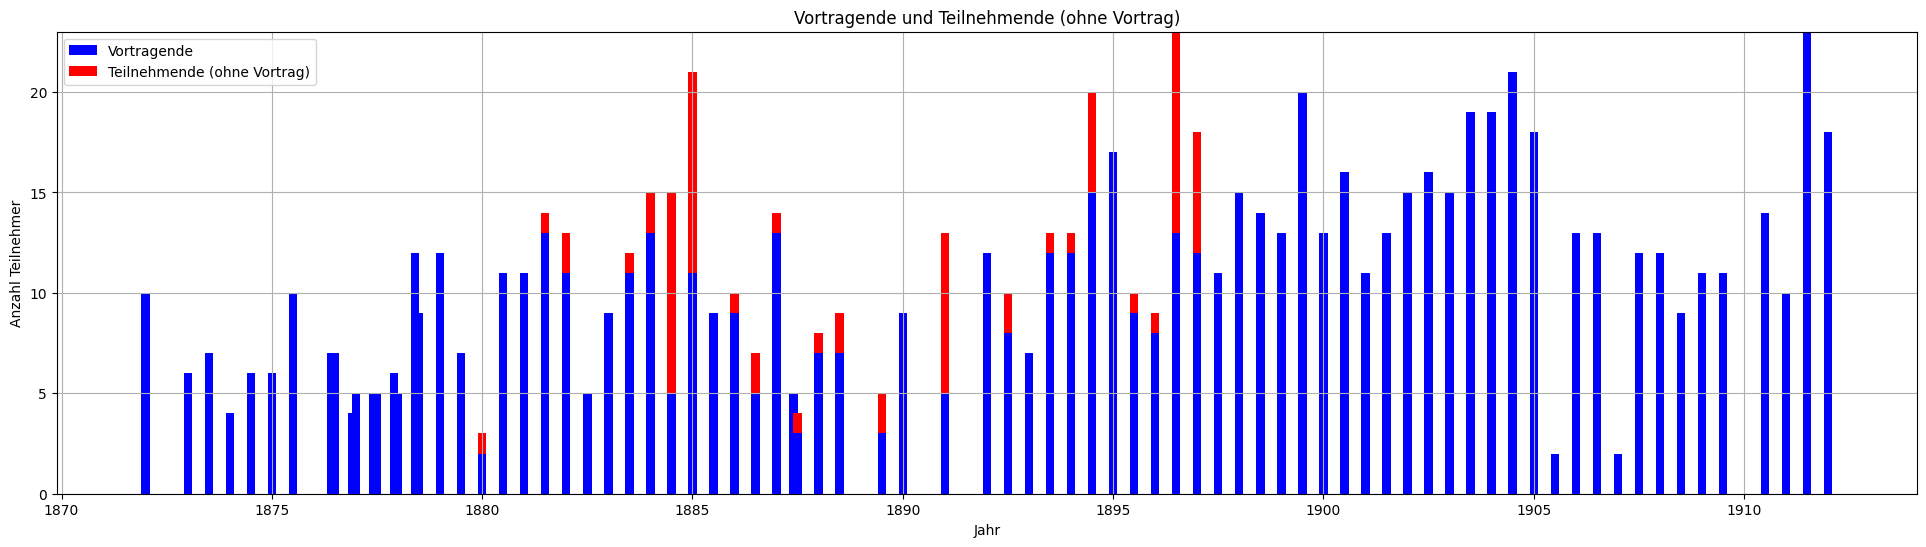

In [87]:
# Extracting data for plotting
years = list(seminar_to_pair.keys())
speakers = [val[0] for val in seminar_to_pair.values()]
participants_no_talk = [val[1] for val in seminar_to_pair.values()]

# Create a stacked bar plot
plt.figure(figsize=(24, 6))
bar_width = 0.2

plt.bar(years, speakers, label="Vortragende", color='b', width=bar_width)
plt.bar(years, participants_no_talk, label="Teilnehmende (ohne Vortrag)", bottom=speakers, color='r', width=bar_width)


# Adding labels and title
plt.xlabel('Jahr')
plt.ylabel('Anzahl Teilnehmer')
plt.title('Vortragende und Teilnehmende (ohne Vortrag)')
plt.legend()

plt.savefig("speakers_participants.svg", format='svg')


# Show the plot
plt.grid(True)
plt.show()